In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Akash Goel\Downloads\h1n1_vaccine_prediction.csv")

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df['has_health_insur'].value_counts(dropna=False)

has_health_insur
1.0    12697
NaN    12274
0.0     1736
Name: count, dtype: int64

In [7]:
def uni_cat(x):
    count = df[x].nunique()
    cat = df[x].unique()
    f1 = pd.DataFrame(df[x].value_counts(dropna=False))
    f2 = pd.DataFrame(df[x].value_counts(dropna=False,normalize=True))
    ff = pd.concat([f1,f2],axis=1)
    print(f'No of unique categories:{count}\n')
    print(f'Unique categories:{cat}\n')
    print(ff)
    ax = sns.countplot(data=df,x=x)
    ax.bar_label(ax.containers[0])
    plt.title(f'Count plot of {x}')
    plt.show()

No of unique categories:2

Unique categories:[ 1. nan  0.]

                  count  proportion
has_health_insur                   
1.0               12697    0.475418
NaN               12274    0.459580
0.0                1736    0.065002


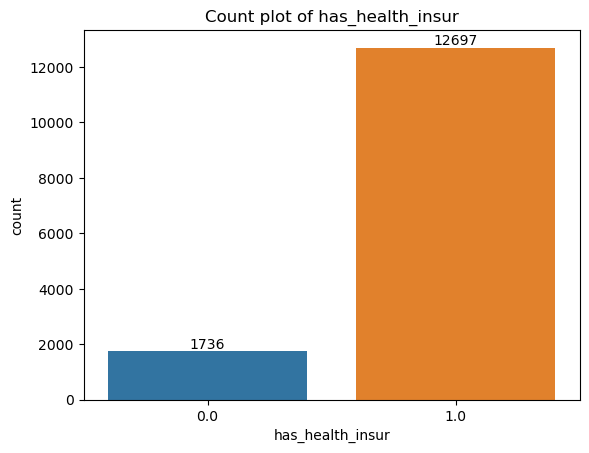

In [8]:
uni_cat('has_health_insur')

In [9]:
df['has_health_insur'] = df['has_health_insur'].fillna('Unknown')

No of unique categories:3

Unique categories:[1.0 'Unknown' 0.0]

                  count  proportion
has_health_insur                   
1.0               12697    0.475418
Unknown           12274    0.459580
0.0                1736    0.065002


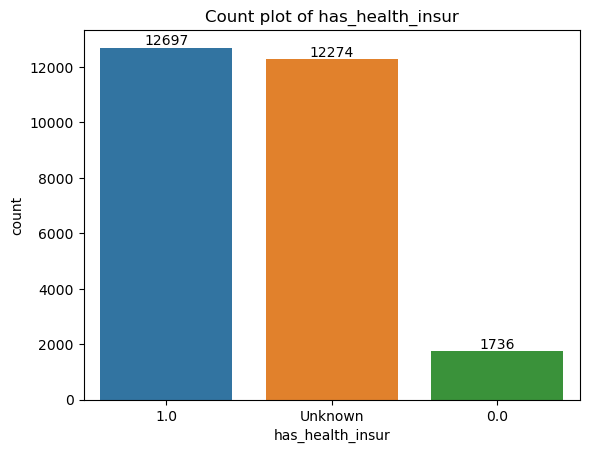

In [10]:
uni_cat('has_health_insur')

No of unique categories:3

Unique categories:['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]

                           count  proportion
income_level                                
<= $75,000, Above Poverty  12777    0.478414
> $75,000                   6810    0.254989
NaN                         4423    0.165612
Below Poverty               2697    0.100985


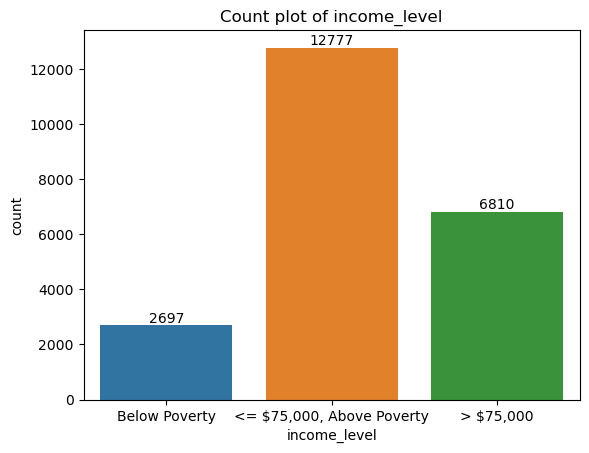

In [11]:
uni_cat('income_level')

No of unique categories:4

Unique categories:[ 0.  3.  2.  1. nan]

                count  proportion
no_of_children                   
0.0             18672    0.699143
1.0              3175    0.118883
2.0              2864    0.107238
3.0              1747    0.065414
NaN               249    0.009323


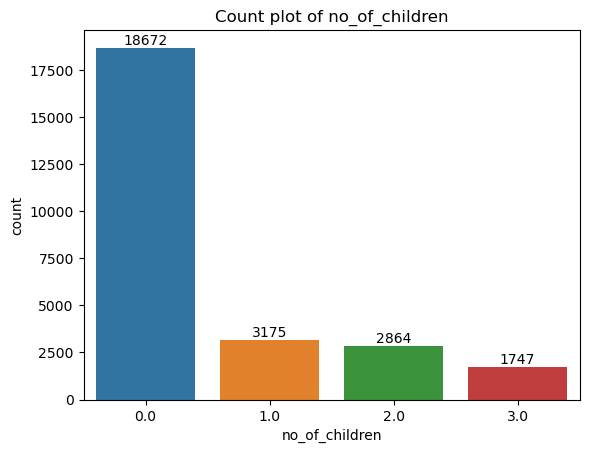

In [12]:
uni_cat('no_of_children')

In [13]:
df['no_of_children'] = df['no_of_children'].fillna(0)

No of unique categories:4

Unique categories:[0. 3. 2. 1.]

                count  proportion
no_of_children                   
0.0             18921    0.708466
1.0              3175    0.118883
2.0              2864    0.107238
3.0              1747    0.065414


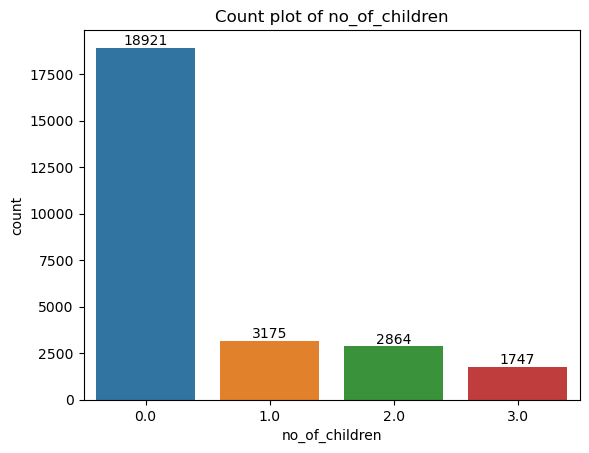

In [14]:
uni_cat('no_of_children')

No of unique categories:4

Unique categories:[ 0.  2.  1.  3. nan]

              count  proportion
no_of_adults                   
1.0           14474    0.541955
0.0            8056    0.301644
2.0            2803    0.104954
3.0            1125    0.042124
NaN             249    0.009323


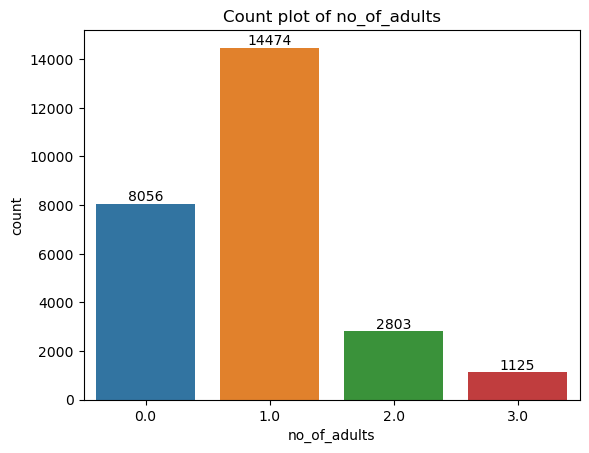

In [15]:
uni_cat('no_of_adults')

In [16]:
df['no_of_adults'] = df['no_of_adults'].fillna(0)

No of unique categories:4

Unique categories:[0. 2. 1. 3.]

              count  proportion
no_of_adults                   
1.0           14474    0.541955
0.0            8305    0.310967
2.0            2803    0.104954
3.0            1125    0.042124


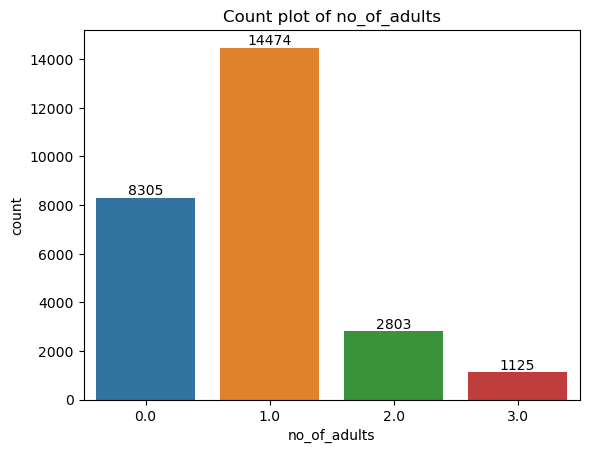

In [17]:
uni_cat('no_of_adults')

No of unique categories:3

Unique categories:['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']

                          count  proportion
census_msa                                 
MSA, Not Principle  City  11645    0.436028
MSA, Principle City        7864    0.294455
Non-MSA                    7198    0.269517


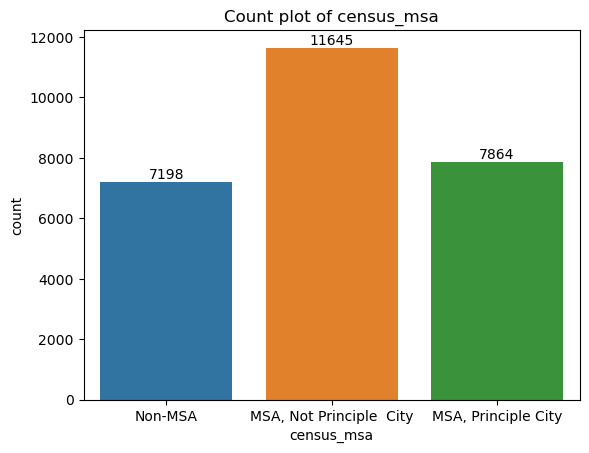

In [18]:
uni_cat('census_msa')

No of unique categories:3

Unique categories:['Not in Labor Force' 'Employed' 'Unemployed' nan]

                    count  proportion
employment                           
Employed            13560    0.507732
Not in Labor Force  10231    0.383083
NaN                  1463    0.054780
Unemployed           1453    0.054405


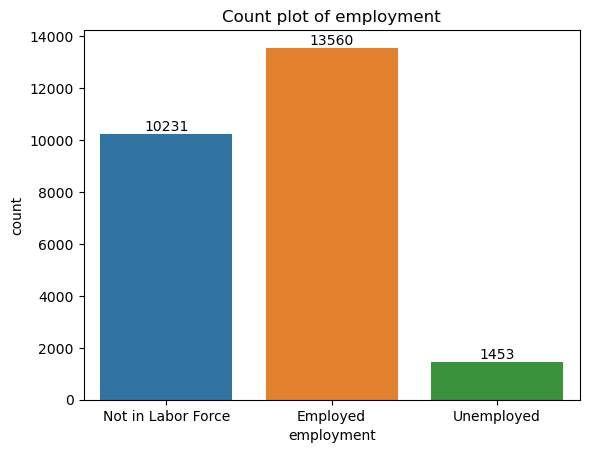

In [19]:
uni_cat('employment')

In [20]:
df['employment'] = df['employment'].fillna('Unemployed')

No of unique categories:3

Unique categories:['Not in Labor Force' 'Employed' 'Unemployed']

                    count  proportion
employment                           
Employed            13560    0.507732
Not in Labor Force  10231    0.383083
Unemployed           2916    0.109185


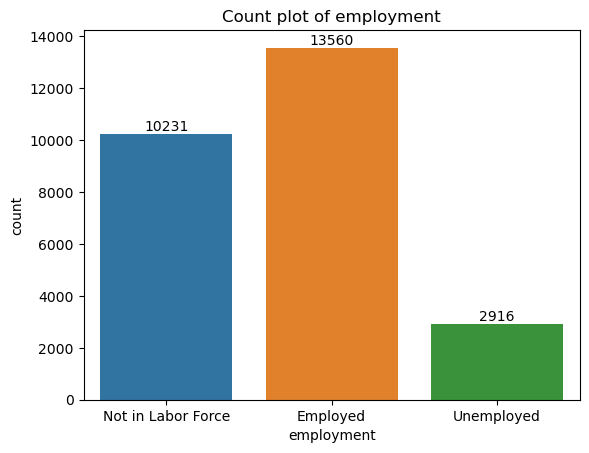

In [21]:
uni_cat('employment')

No of unique categories:2

Unique categories:['Own' 'Rent' nan]

                count  proportion
housing_status                   
Own             18736    0.701539
Rent             5929    0.222002
NaN              2042    0.076459


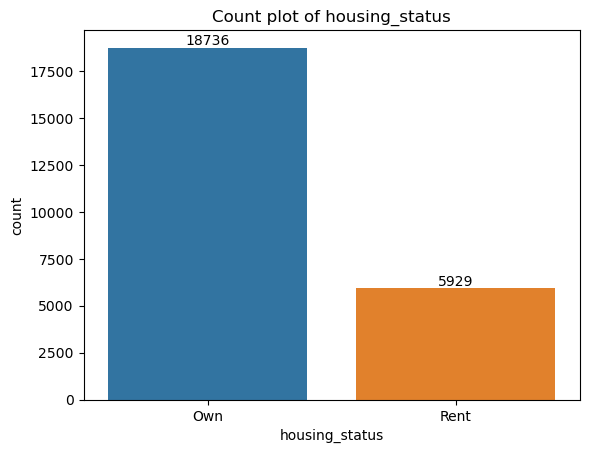

In [22]:
uni_cat('housing_status')

In [23]:
df['housing_status'] = df['housing_status'].fillna('unknown')

No of unique categories:2

Unique categories:['Not Married' 'Married' nan]

                count  proportion
marital_status                   
Married         13555    0.507545
Not Married     11744    0.439735
NaN              1408    0.052720


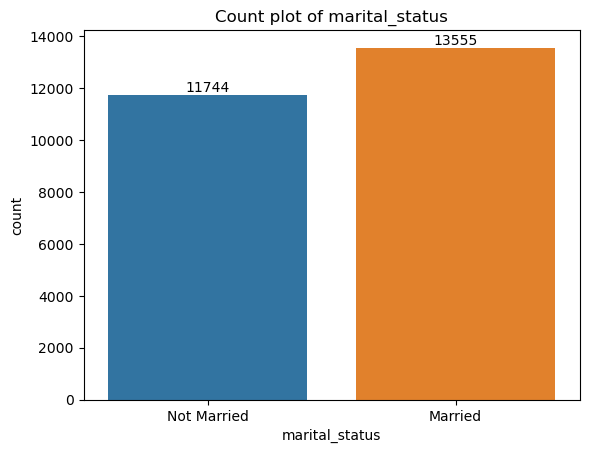

In [24]:
uni_cat('marital_status')

In [25]:
df['marital_status'] = df['marital_status'].fillna('Not Married')

No of unique categories:2

Unique categories:['Not Married' 'Married']

                count  proportion
marital_status                   
Married         13555    0.507545
Not Married     13152    0.492455


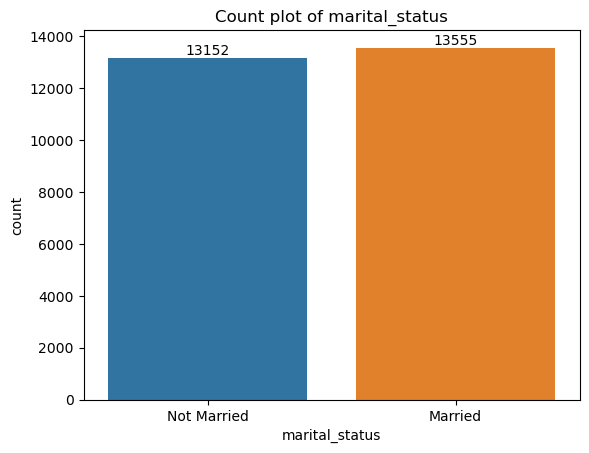

In [26]:
uni_cat('marital_status')

No of unique categories:2

Unique categories:['Female' 'Male']

        count  proportion
sex                      
Female  15858    0.593777
Male    10849    0.406223


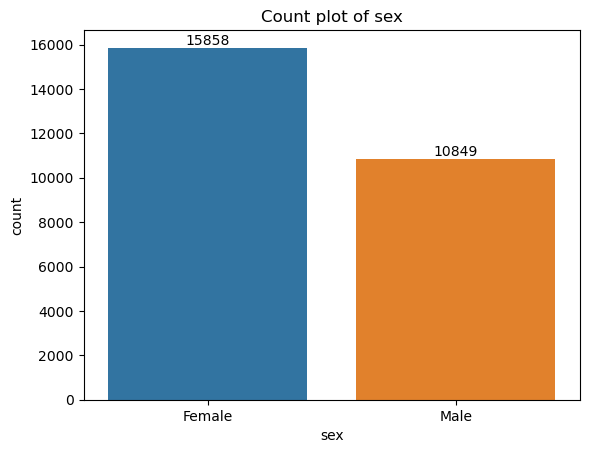

In [27]:
uni_cat('sex')

No of unique categories:4

Unique categories:['White' 'Black' 'Other or Multiple' 'Hispanic']

                   count  proportion
race                                
White              21222    0.794623
Black               2118    0.079305
Hispanic            1755    0.065713
Other or Multiple   1612    0.060359


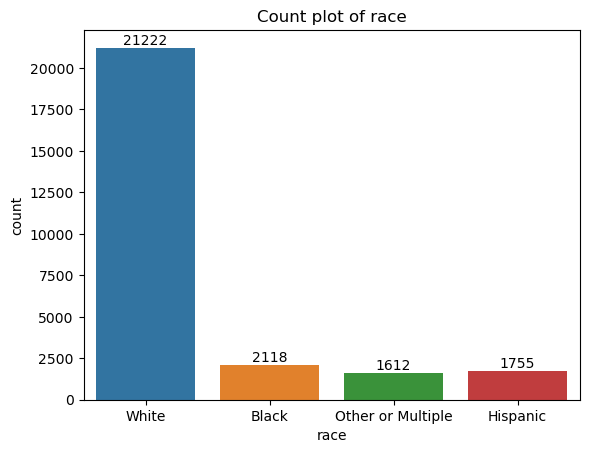

In [28]:
uni_cat('race')

No of unique categories:4

Unique categories:['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]

                  count  proportion
qualification                      
College Graduate  10097    0.378066
Some College       7043    0.263714
12 Years           5797    0.217059
< 12 Years         2363    0.088479
NaN                1407    0.052683


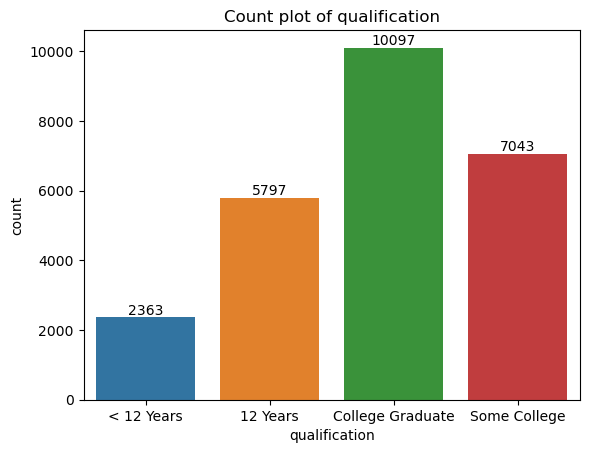

In [29]:
uni_cat('qualification')

In [30]:
df['qualification'] = df['qualification'].fillna('< 12 Years')

No of unique categories:4

Unique categories:['< 12 Years' '12 Years' 'College Graduate' 'Some College']

                  count  proportion
qualification                      
College Graduate  10097    0.378066
Some College       7043    0.263714
12 Years           5797    0.217059
< 12 Years         3770    0.141161


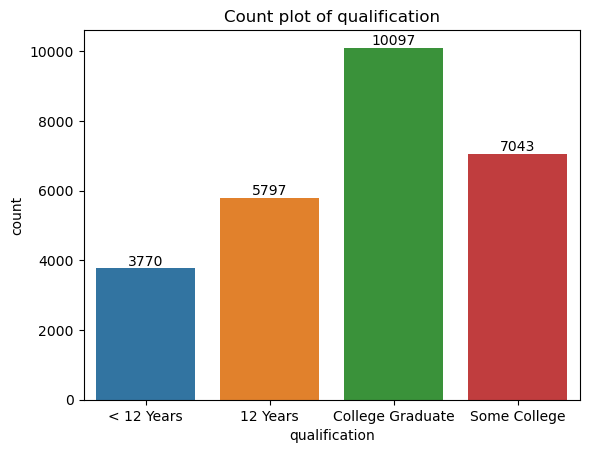

In [31]:
uni_cat('qualification')

No of unique categories:5

Unique categories:['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

               count  proportion
age_bracket                     
65+ Years       6843    0.256225
55 - 64 Years   5563    0.208297
45 - 54 Years   5238    0.196128
18 - 34 Years   5215    0.195267
35 - 44 Years   3848    0.144082


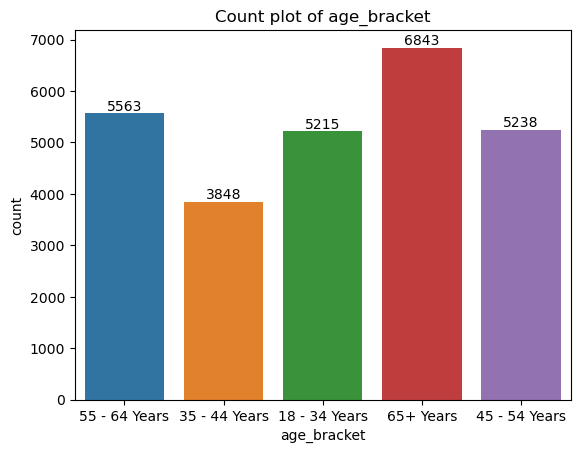

In [32]:
uni_cat('age_bracket')

No of unique categories:3

Unique categories:['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]

                           count  proportion
income_level                                
<= $75,000, Above Poverty  12777    0.478414
> $75,000                   6810    0.254989
NaN                         4423    0.165612
Below Poverty               2697    0.100985


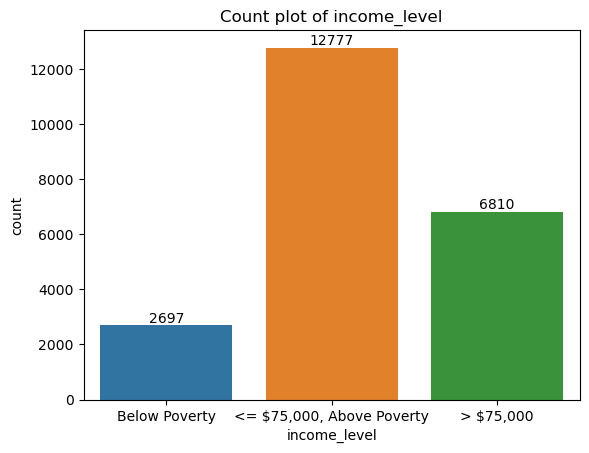

In [33]:
uni_cat('income_level')

In [34]:
df['income_level'] = df['income_level'].fillna('unknown')

No of unique categories:5

Unique categories:[ 2.  4.  1.  5. nan  3.]

                     count  proportion
sick_from_seas_vacc                   
1.0                  11870    0.444453
2.0                   7633    0.285805
4.0                   4852    0.181675
5.0                   1721    0.064440
NaN                    537    0.020107
3.0                     94    0.003520


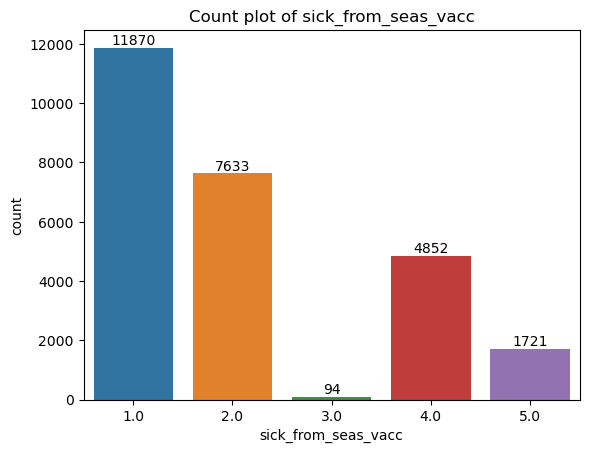

In [35]:
uni_cat('sick_from_seas_vacc')

In [36]:
df['sick_from_seas_vacc'] = df['sick_from_seas_vacc'].fillna(3.0)

No of unique categories:5

Unique categories:[2. 4. 1. 5. 3.]

                     count  proportion
sick_from_seas_vacc                   
1.0                  11870    0.444453
2.0                   7633    0.285805
4.0                   4852    0.181675
5.0                   1721    0.064440
3.0                    631    0.023627


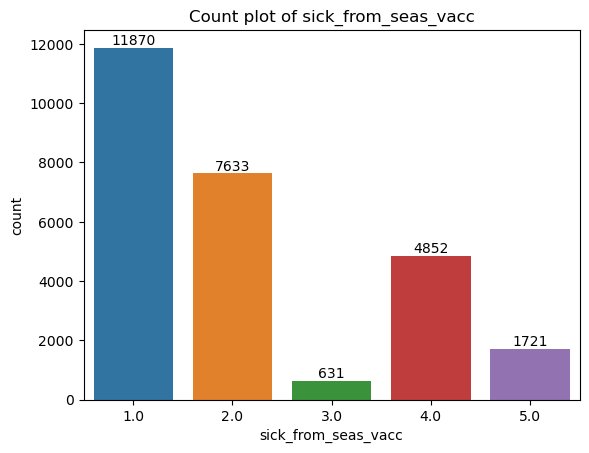

In [37]:
uni_cat('sick_from_seas_vacc')

No of unique categories:5

Unique categories:[ 1.  2.  4.  3.  5. nan]

               count  proportion
is_seas_risky                   
2.0             8954    0.335268
4.0             7630    0.285693
1.0             5974    0.223687
5.0             2958    0.110757
3.0              677    0.025349
NaN              514    0.019246


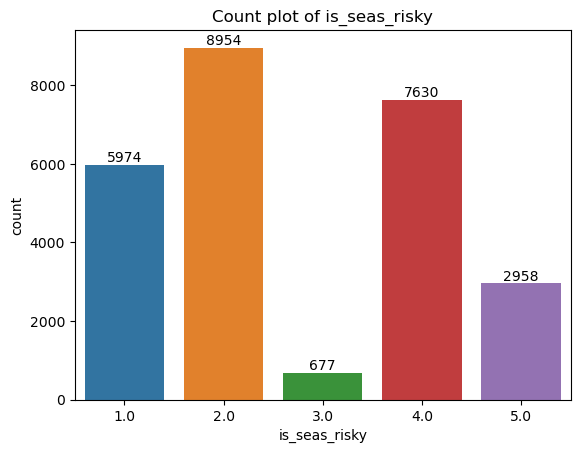

In [38]:
uni_cat('is_seas_risky')

In [39]:
df['is_seas_risky'] = df['is_seas_risky'].fillna(3.0)

No of unique categories:5

Unique categories:[ 2.  4.  5.  3.  1. nan]

                        count  proportion
is_seas_vacc_effective                   
4.0                     11629    0.435429
5.0                      9973    0.373423
2.0                      2206    0.082600
1.0                      1221    0.045718
3.0                      1216    0.045531
NaN                       462    0.017299


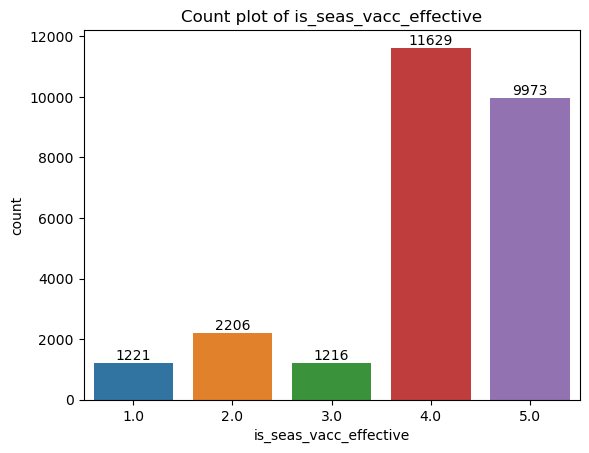

In [40]:
uni_cat('is_seas_vacc_effective')

In [41]:
df['is_seas_vacc_effective'] = df['is_seas_vacc_effective'].fillna(4.0)

No of unique categories:5

Unique categories:[2. 4. 5. 3. 1.]

                        count  proportion
is_seas_vacc_effective                   
4.0                     12091    0.452728
5.0                      9973    0.373423
2.0                      2206    0.082600
1.0                      1221    0.045718
3.0                      1216    0.045531


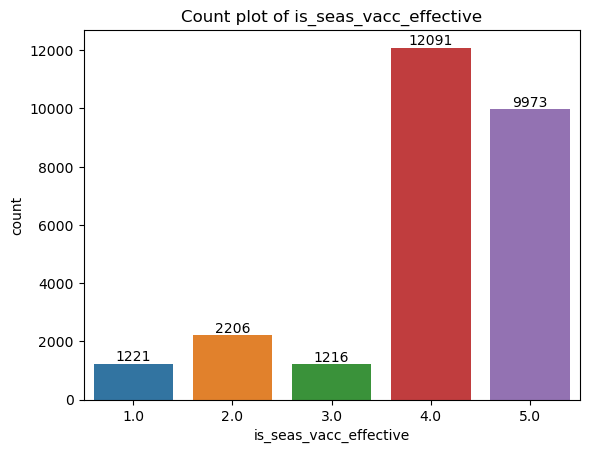

In [42]:
uni_cat('is_seas_vacc_effective')

No of unique categories:5

Unique categories:[ 2.  4.  1.  5.  3. nan]

                     count  proportion
sick_from_h1n1_vacc                   
2.0                   9129    0.341820
1.0                   8998    0.336915
4.0                   5850    0.219044
5.0                   2187    0.081889
NaN                    395    0.014790
3.0                    148    0.005542


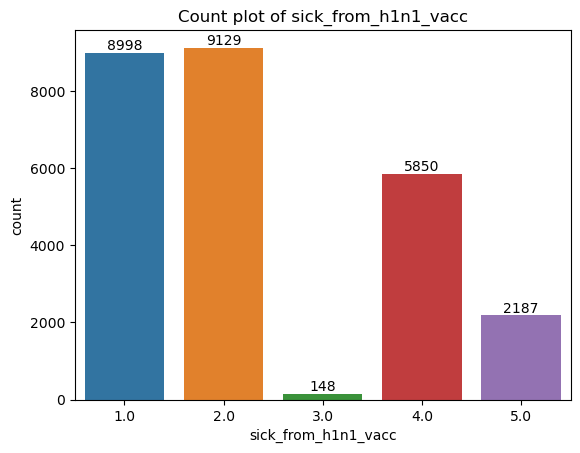

In [43]:
uni_cat('sick_from_h1n1_vacc')

In [44]:
df['sick_from_h1n1_vacc'] = df['sick_from_h1n1_vacc'].fillna(3.0)

No of unique categories:5

Unique categories:[ 1.  4.  3.  2.  5. nan]

               count  proportion
is_h1n1_risky                   
2.0             9919    0.371401
1.0             8139    0.304752
4.0             5394    0.201970
5.0             1750    0.065526
3.0             1117    0.041824
NaN              388    0.014528


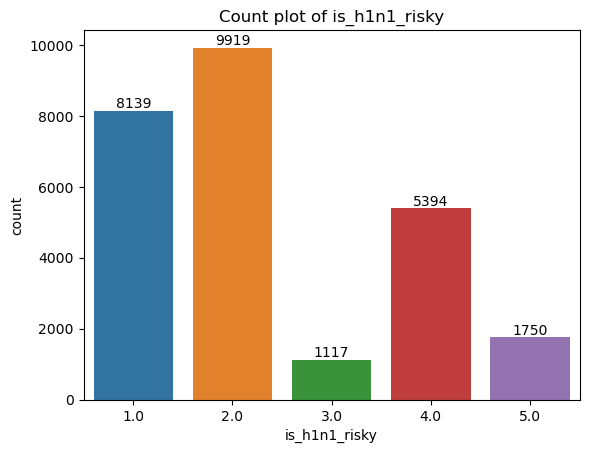

In [45]:
uni_cat('is_h1n1_risky')

In [46]:
df['is_h1n1_risky'] = df['is_h1n1_risky'].fillna(3.0)

No of unique categories:5

Unique categories:[ 3.  5.  4.  2.  1. nan]

                        count  proportion
is_h1n1_vacc_effective                   
4.0                     11683    0.437451
5.0                      7166    0.268319
3.0                      4723    0.176845
2.0                      1858    0.069570
1.0                       886    0.033175
NaN                       391    0.014640


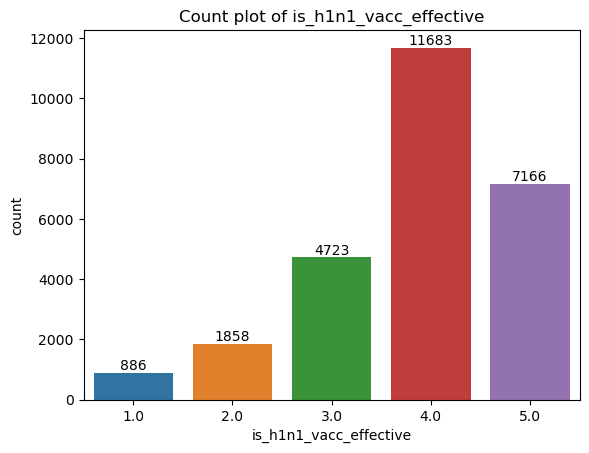

In [47]:
uni_cat('is_h1n1_vacc_effective')

In [48]:
df['is_h1n1_vacc_effective'] = df['is_h1n1_vacc_effective'].fillna(4.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                  count  proportion
is_health_worker                   
0.0               23004    0.861347
1.0                2899    0.108548
NaN                 804    0.030104


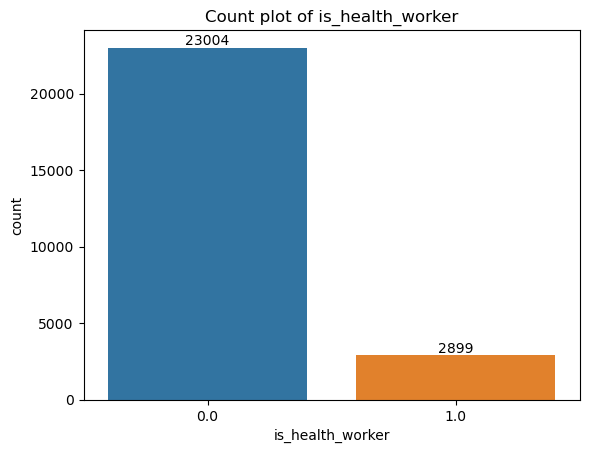

In [49]:
uni_cat('is_health_worker')

In [50]:
df['is_health_worker'] = df['is_health_worker'].fillna(0.0)

In [51]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

No of unique categories:3

Unique categories:[1.0 'Unknown' 0.0]

                  count  proportion
has_health_insur                   
1.0               12697    0.475418
Unknown           12274    0.459580
0.0                1736    0.065002


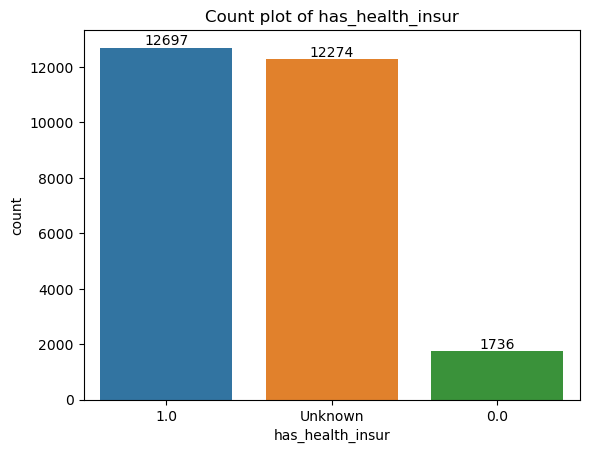

In [52]:
uni_cat('has_health_insur')

In [53]:
df['has_health_insur'] = df['has_health_insur'].replace({'Unknown':0})

No of unique categories:2

Unique categories:[1. 0.]

                  count  proportion
has_health_insur                   
0.0               14010    0.524582
1.0               12697    0.475418


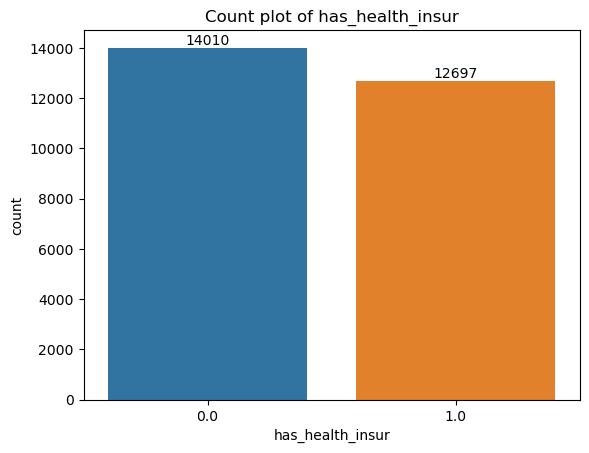

In [54]:
uni_cat('has_health_insur')

No of unique categories:2

Unique categories:[ 0.  1. nan]

                         count  proportion
cont_child_undr_6_mnths                   
0.0                      23749    0.889243
1.0                       2138    0.080054
NaN                        820    0.030704


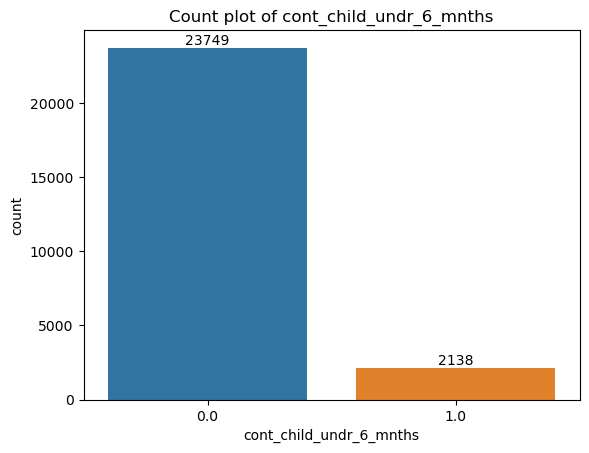

In [55]:
uni_cat('cont_child_undr_6_mnths')

In [56]:
df['cont_child_undr_6_mnths'] = df['cont_child_undr_6_mnths'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                         count  proportion
chronic_medic_condition                   
0.0                      18446    0.690680
1.0                       7290    0.272962
NaN                        971    0.036358


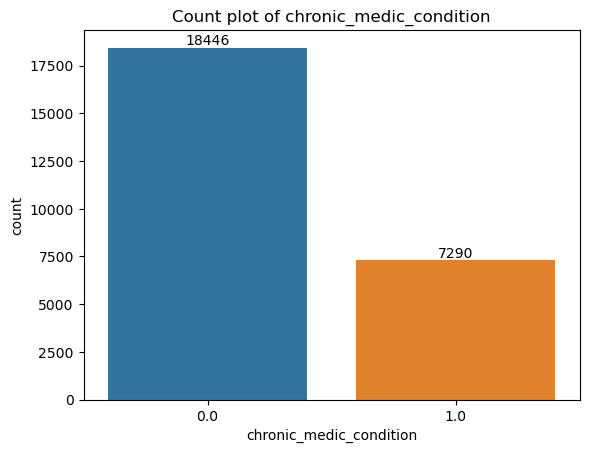

In [57]:
uni_cat('chronic_medic_condition')

In [58]:
df['chronic_medic_condition'] = df['chronic_medic_condition'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0. nan  1.]

                       count  proportion
dr_recc_seasonal_vacc                   
0.0                    16453    0.616056
1.0                     8094    0.303067
NaN                     2160    0.080878


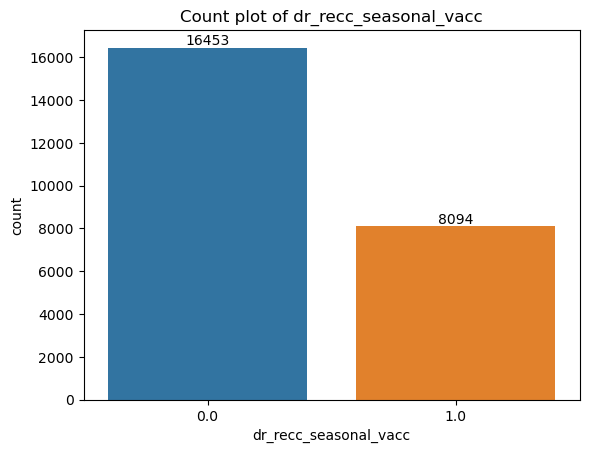

In [59]:
uni_cat('dr_recc_seasonal_vacc')

In [63]:
df['dr_recc_seasonal_vacc'] = df['dr_recc_seasonal_vacc'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0. nan  1.]

                   count  proportion
dr_recc_h1n1_vacc                   
0.0                19139    0.716629
1.0                 5408    0.202494
NaN                 2160    0.080878


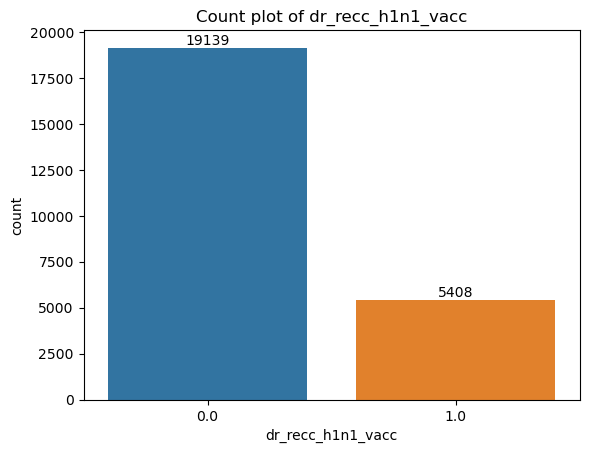

In [61]:
uni_cat('dr_recc_h1n1_vacc')

In [64]:
df['dr_recc_h1n1_vacc'] = df['dr_recc_h1n1_vacc'].fillna(0.0)

No of unique categories:2

Unique categories:[ 1.  0. nan]

                  count  proportion
avoid_touch_face                   
1.0               18001    0.674018
0.0                8578    0.321189
NaN                 128    0.004793


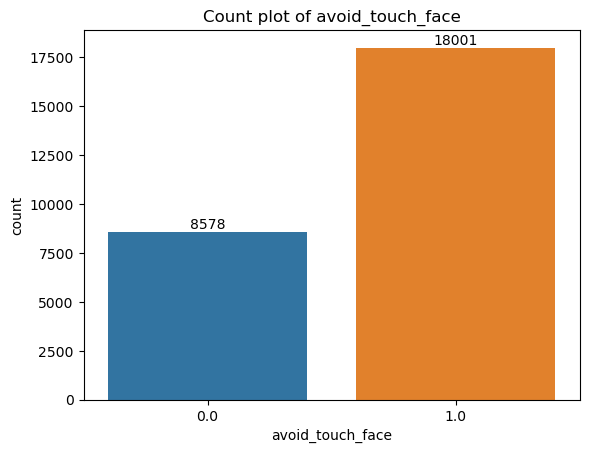

In [65]:
uni_cat('avoid_touch_face')

In [66]:
df['avoid_touch_face'] = df['avoid_touch_face'].fillna(0.0)

No of unique categories:2

Unique categories:[ 1.  0. nan]

                           count  proportion
reduced_outside_home_cont                   
0.0                        17644    0.660651
1.0                         8981    0.336279
NaN                           82    0.003070


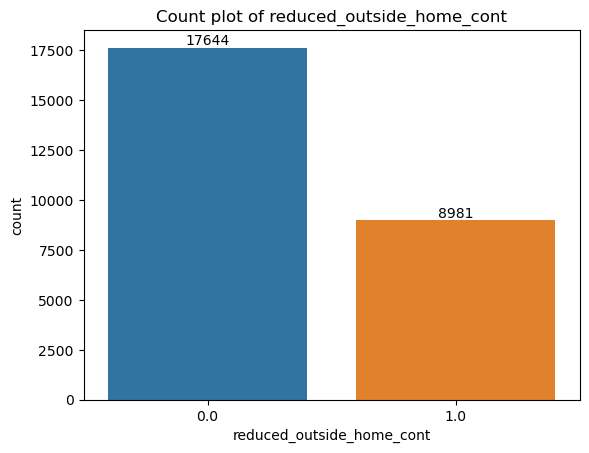

In [67]:
uni_cat('reduced_outside_home_cont')

In [68]:
df['reduced_outside_home_cont'] = df['reduced_outside_home_cont'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                        count  proportion
avoid_large_gatherings                   
0.0                     17073    0.639271
1.0                      9547    0.357472
NaN                        87    0.003258


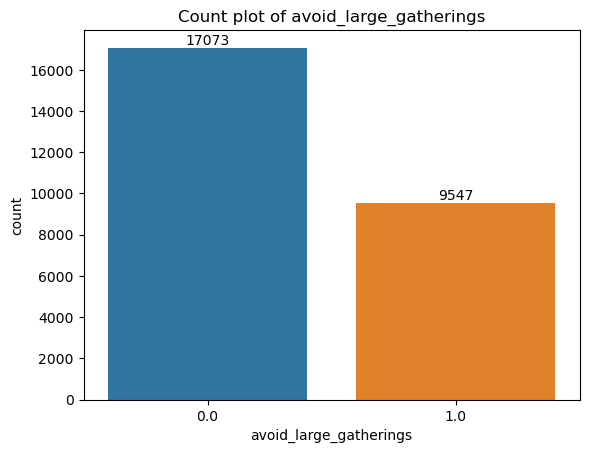

In [69]:
uni_cat('avoid_large_gatherings')

In [70]:
df['avoid_large_gatherings'] = df['avoid_large_gatherings'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                       count  proportion
wash_hands_frequently                   
1.0                    22015    0.824316
0.0                     4650    0.174112
NaN                       42    0.001573


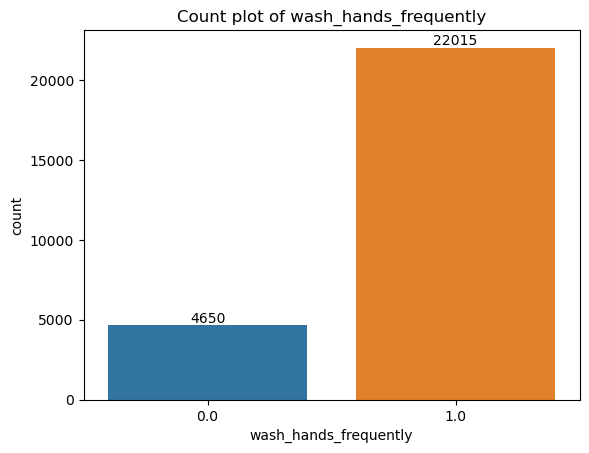

In [71]:
uni_cat('wash_hands_frequently')

In [72]:
df['wash_hands_frequently'] = df['wash_hands_frequently'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                  count  proportion
bought_face_mask                   
0.0               24847    0.930355
1.0                1841    0.068933
NaN                  19    0.000711


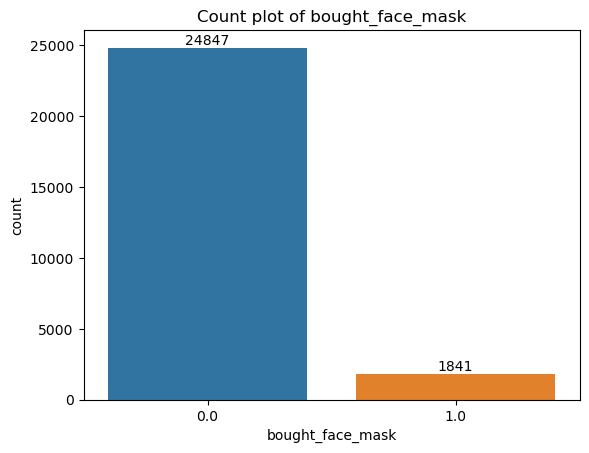

In [73]:
uni_cat('bought_face_mask')

In [74]:
df['bought_face_mask'] = df['bought_face_mask'].fillna(0.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                   count  proportion
contact_avoidance                   
1.0                19228    0.719961
0.0                 7271    0.272251
NaN                  208    0.007788


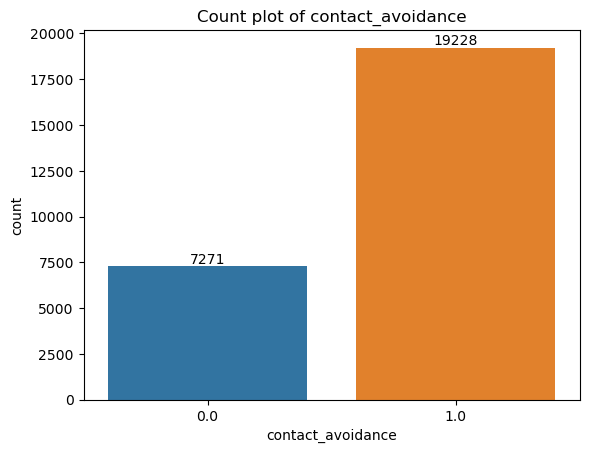

In [75]:
uni_cat('contact_avoidance')

In [76]:
df['contact_avoidance'] = df['contact_avoidance'].fillna(1.0)

No of unique categories:2

Unique categories:[ 0.  1. nan]

                      count  proportion
antiviral_medication                   
0.0                   25335    0.948628
1.0                    1301    0.048714
NaN                      71    0.002658


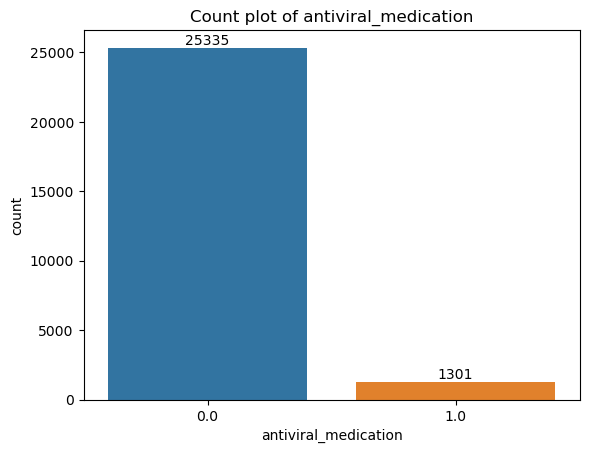

In [77]:
uni_cat('antiviral_medication')

In [78]:
df['antiviral_medication'] = df['antiviral_medication'].fillna(1.0)

No of unique categories:3

Unique categories:[ 0.  2.  1. nan]

                count  proportion
h1n1_awareness                   
1.0             14598    0.546598
2.0              9487    0.355225
0.0              2506    0.093833
NaN               116    0.004343


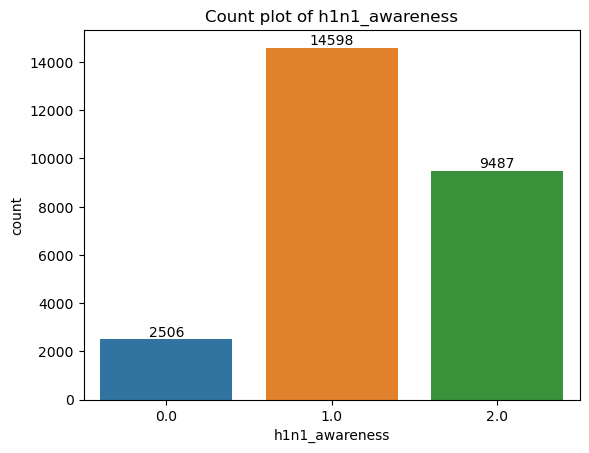

In [79]:
uni_cat('h1n1_awareness')

In [80]:
df['h1n1_awareness'] = df['h1n1_awareness'].fillna(1.0)

No of unique categories:4

Unique categories:[ 1.  3.  2.  0. nan]

            count  proportion
h1n1_worry                   
2.0         10575    0.395964
1.0          8153    0.305276
3.0          4591    0.171902
0.0          3296    0.123413
NaN            92    0.003445


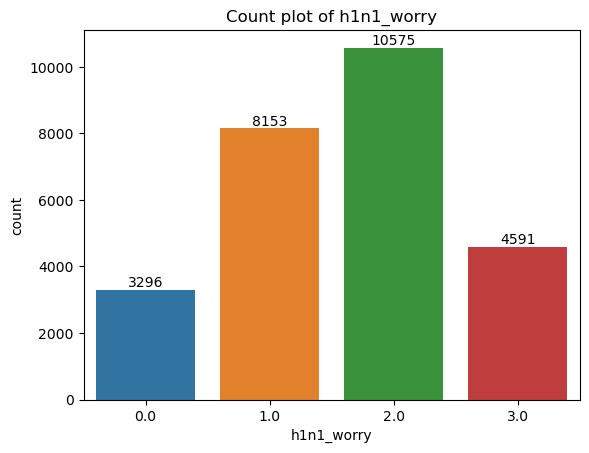

In [81]:
uni_cat('h1n1_worry')

In [82]:
df['h1n1_worry'] = df['h1n1_worry'].fillna(2.0)

In [83]:
df.dtypes[df.dtypes==object].index

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [84]:
cols = ['age_bracket', 'qualification', 'race', 'sex', 'income_level','marital_status', 'housing_status', 'employment', 'census_msa']

In [85]:
x = df.copy()

In [86]:
x = pd.get_dummies(data=x,columns=cols,dtype=int,drop_first=True)

In [87]:
x

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,"income_level_> $75,000",income_level_Below Poverty,income_level_unknown,marital_status_Not Married,housing_status_Rent,housing_status_unknown,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,1,0,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,1,1,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,1,1,0,0,0,1,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [88]:
x = x.drop(['unique_id','h1n1_vaccine'],axis=1)

In [89]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   h1n1_worry                      26707 non-null  float64
 1   h1n1_awareness                  26707 non-null  float64
 2   antiviral_medication            26707 non-null  float64
 3   contact_avoidance               26707 non-null  float64
 4   bought_face_mask                26707 non-null  float64
 5   wash_hands_frequently           26707 non-null  float64
 6   avoid_large_gatherings          26707 non-null  float64
 7   reduced_outside_home_cont       26707 non-null  float64
 8   avoid_touch_face                26707 non-null  float64
 9   dr_recc_h1n1_vacc               26707 non-null  float64
 10  dr_recc_seasonal_vacc           26707 non-null  float64
 11  chronic_medic_condition         26707 non-null  float64
 12  cont_child_undr_6_mnths         

In [90]:
y = df['h1n1_vaccine']

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=99)

In [92]:
from sklearn.metrics import *

In [93]:
lr = LogisticRegression(max_iter=1000)

In [94]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [95]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    pre_test = precision_score(y_test,ypred,pos_label=1)
    rec_test = recall_score(y_test,ypred,pos_label=1)
    res_df = pd.DataFrame({'train_score':train_score,'test_score':test_score,'pre_test':pre_test,'rec_test':rec_test},
                          index=[mname])
    print(cm)
    print(cr)
    return res_df,ypred

In [96]:
lr_res,ypred_lr = eval_model(lr,x_train,y_train,x_test,y_test,'LogReg')

[[6000  338]
 [ 903  772]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6338
           1       0.70      0.46      0.55      1675

    accuracy                           0.85      8013
   macro avg       0.78      0.70      0.73      8013
weighted avg       0.83      0.85      0.83      8013



In [97]:
lr_res

,train_score,test_score,pre_test,rec_test
LogReg,0.852787,0.845127,0.695495,0.460896


In [98]:
dtc = DecisionTreeClassifier()

In [99]:
dtc_res,ypred = eval_model(dtc,x_train,y_train,x_test,y_test,'DecisionTreeClassifier')

[[5390  948]
 [ 854  821]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6338
           1       0.46      0.49      0.48      1675

    accuracy                           0.78      8013
   macro avg       0.66      0.67      0.67      8013
weighted avg       0.78      0.78      0.78      8013



In [100]:
dtc_res

,train_score,test_score,pre_test,rec_test
DecisionTreeClassifier,1.0,0.775115,0.464104,0.490149


In [101]:
params = {'criterion':['gini','entropy'],
          'max_depth':[2,5,8,10,12,15,20],
    'min_samples_leaf':[2,5,8,12,15,20,35],
  'min_samples_split':[10,20,35,50,75,125,150,200]}

In [104]:
search = RandomizedSearchCV(estimator=dtc,n_jobs=-1,cv=10,param_distributions=params)

In [105]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10, 12, 15, 20],
                                        'min_samples_leaf': [2, 5, 8, 12, 15,
                                                             20, 35],
                                        'min_samples_split': [10, 20, 35, 50,
                                                              75, 125, 150,
                                                              200]})

In [106]:
search.best_score_

0.8445486590959164

In [107]:
best_params = search.best_params_

In [108]:
dtc2 = DecisionTreeClassifier(**best_params)

In [109]:
dtc_param,ypred = eval_model(dtc2,x_train,y_train,x_test,y_test,'DecisionTreeClassifier(With Params)')

[[5988  350]
 [ 907  768]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6338
           1       0.69      0.46      0.55      1675

    accuracy                           0.84      8013
   macro avg       0.78      0.70      0.73      8013
weighted avg       0.83      0.84      0.83      8013



In [110]:
dtc_param

,train_score,test_score,pre_test,rec_test
DecisionTreeClassifier(With Params),0.85161,0.84313,0.686941,0.458507


In [111]:
Bag_dtc = BaggingClassifier(n_estimators=100,estimator=dtc2)

In [112]:
bag,ypred = eval_model(Bag_dtc,x_train,y_train,x_test,y_test,'Bagging with Decision Tree')

[[6040  298]
 [ 935  740]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6338
           1       0.71      0.44      0.55      1675

    accuracy                           0.85      8013
   macro avg       0.79      0.70      0.73      8013
weighted avg       0.83      0.85      0.83      8013



In [113]:
bag

,train_score,test_score,pre_test,rec_test
Bagging with Decision Tree,0.854445,0.846125,0.712909,0.441791


In [114]:
Bag_lr = BaggingClassifier(n_estimators=100,estimator=lr)

In [115]:
bag_lr,ypred = eval_model(Bag_lr,x_train,y_train,x_test,y_test,'Bagging with LogReg')

[[6004  334]
 [ 906  769]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6338
           1       0.70      0.46      0.55      1675

    accuracy                           0.85      8013
   macro avg       0.78      0.70      0.73      8013
weighted avg       0.83      0.85      0.83      8013



In [116]:
bag_lr

,train_score,test_score,pre_test,rec_test
Bagging with LogReg,0.852733,0.845251,0.697189,0.459104


In [117]:
rf = RandomForestClassifier()

In [118]:
rf1,ypred = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')

[[6077  261]
 [ 983  692]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6338
           1       0.73      0.41      0.53      1675

    accuracy                           0.84      8013
   macro avg       0.79      0.69      0.72      8013
weighted avg       0.83      0.84      0.83      8013



In [119]:
rf1

,train_score,test_score,pre_test,rec_test
Random Forest,0.999947,0.844752,0.726128,0.413134


In [120]:
params = {'criterion':['gini','entropy'],
          'max_depth':[2,5,8,10,12,15,20],
    'min_samples_leaf':[2,5,8,12,15,20,35],
  'min_samples_split':[10,20,35,50,75,125,150,200],
           'bootstrap':[True],
         'n_estimators':[25,50,75,100,150,200],
          'max_samples':[0.7,0.75],
          'max_features':['sqrt','log2']
         }

In [121]:
r_search = RandomizedSearchCV(estimator=rf,param_distributions=params,n_jobs=-1,cv=10)

In [122]:
r_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10, 12, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.7, 0.75],
                                        'min_samples_leaf': [2, 5, 8, 12, 15,
                                                             20, 35],
                                        'min_samples_split': [10, 20, 35, 50,
                                                              75, 125, 150,
                                                              200],
                                        'n_estimators': [25, 50, 75, 100, 150,
                                                         200]})

In [123]:
r_search.best_score_

0.8464749086560058

In [124]:
best_p = r_search.best_params_

In [125]:
rf2 = RandomForestClassifier(**best_p)

In [126]:
rf2_res,ypred = eval_model(rf2,x_train,y_train,x_test,y_test,'RandomForest with Params')

[[6133  205]
 [1026  649]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6338
           1       0.76      0.39      0.51      1675

    accuracy                           0.85      8013
   macro avg       0.81      0.68      0.71      8013
weighted avg       0.84      0.85      0.83      8013



In [127]:
rf2_res

,train_score,test_score,pre_test,rec_test
RandomForest with Params,0.867444,0.846375,0.759953,0.387463


In [128]:
final_result = pd.concat([lr_res,dtc_res,dtc_param,bag,bag_lr,rf1,rf2_res],axis=0)

In [129]:
final_result

,train_score,test_score,pre_test,rec_test
LogReg,0.852787,0.845127,0.695495,0.460896
DecisionTreeClassifier,1.000000,0.775115,0.464104,0.490149
DecisionTreeClassifier(With Params),0.851610,0.843130,0.686941,0.458507
Bagging with Decision Tree,0.854445,0.846125,0.712909,0.441791
Bagging with LogReg,0.852733,0.845251,0.697189,0.459104
Random Forest,0.999947,0.844752,0.726128,0.413134
RandomForest with Params,0.867444,0.846375,0.759953,0.387463


In [132]:
from sklearn.svm import SVC

In [136]:
svc = SVC(kernel='poly')

In [137]:
svc_res,ypred = eval_model(svc,x_train,y_train,x_test,y_test,'svc')

[[6106  232]
 [ 949  726]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6338
           1       0.76      0.43      0.55      1675

    accuracy                           0.85      8013
   macro avg       0.81      0.70      0.73      8013
weighted avg       0.84      0.85      0.84      8013



In [138]:
svc_res

,train_score,test_score,pre_test,rec_test
svc,0.861881,0.852615,0.757829,0.433433


In [139]:
svc1 = SVC(kernel='linear')

In [143]:
svc1_res,ypred = eval_model(svc1,x_train,y_train,x_test,y_test,'svc1')

[[6016  322]
 [ 917  758]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6338
           1       0.70      0.45      0.55      1675

    accuracy                           0.85      8013
   macro avg       0.78      0.70      0.73      8013
weighted avg       0.83      0.85      0.83      8013



In [144]:
svc1_res

,train_score,test_score,pre_test,rec_test
svc1,0.852413,0.845376,0.701852,0.452537


In [145]:
svc2 = SVC(kernel='sigmoid')

In [147]:
svc2_res,ypred = eval_model(svc2,x_train,y_train,x_test,y_test,'svc2')

[[4874 1464]
 [1470  205]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6338
           1       0.12      0.12      0.12      1675

    accuracy                           0.63      8013
   macro avg       0.45      0.45      0.45      8013
weighted avg       0.63      0.63      0.63      8013



In [148]:
svc2_res

,train_score,test_score,pre_test,rec_test
svc2,0.627367,0.633845,0.122828,0.122388


In [150]:
from sklearn.linear_model import SGDClassifier

In [151]:
sgd = SGDClassifier()

In [152]:
SGD_res,ypred = eval_model(sgd,x_train,y_train,x_test,y_test,'SGD')

[[5922  416]
 [ 851  824]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6338
           1       0.66      0.49      0.57      1675

    accuracy                           0.84      8013
   macro avg       0.77      0.71      0.73      8013
weighted avg       0.83      0.84      0.83      8013



In [153]:
SGD_res

,train_score,test_score,pre_test,rec_test
SGD,0.848508,0.841882,0.664516,0.49194


In [154]:
final_result = pd.concat([final_result,SGD_res,svc2_res,svc1_res,svc_res],axis=0)

In [155]:
final_result

,train_score,test_score,pre_test,rec_test
LogReg,0.852787,0.845127,0.695495,0.460896
DecisionTreeClassifier,1.000000,0.775115,0.464104,0.490149
DecisionTreeClassifier(With Params),0.851610,0.843130,0.686941,0.458507
Bagging with Decision Tree,0.854445,0.846125,0.712909,0.441791
Bagging with LogReg,0.852733,0.845251,0.697189,0.459104
Random Forest,0.999947,0.844752,0.726128,0.413134
RandomForest with Params,0.867444,0.846375,0.759953,0.387463
SGD,0.848508,0.841882,0.664516,0.491940
svc2,0.627367,0.633845,0.122828,0.122388
svc1,0.852413,0.845376,0.701852,0.452537
